# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [5]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 10000000

In [6]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/" + chat + "/message_1.json"
        
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [7]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [8]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)


print('Finished processing chats...')

Analyzing 2 chats...
hugozhang_19wpl6oggg
veveyzhan_3f7gihqw4q
Finished processing chats...


In [9]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 109389 messages - hugozhang_19wpl6oggg
1 - 37490 messages - veveyzhan_3f7gihqw4q
Found 1300 invalid messages...
Found 2 chats with 10 messages or more


In [14]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    print("test")
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        print(person)
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        print(person)
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()

    
def steveli_veveyzhan_profanity_meter(chat_number):
    chats = sorted_chats[chat_number]
    swears = {"fuk": 0, "fuck": 0, "fucking": 0, "stfu":0, "fucker":0, "fk": 0, "shit":0, "sht":0, "bitch":0, "hell":0, "damn":0}
    people = {}
    barWidth = 0.25
    
    messages = chats[2]
    i = 0
    for message in messages: 
        try:
            message_content = message["content"]
            time = message["timestamp_ms"]
            
            name = message["sender_name"]
            words = message_content.split(); 
            for word in words: 
                if word in swears:
                    people[name] = people.get(name,{"fuk": 0, "fuck": 0, "fucking": 0, "stfu":0, "fucker":0, "fk": 0, "shit":0, "sht":0, "bitch":0, "hell":0, "damn":0} )
                    people[name][word] = people[name][word] + 1
                    #swears[word] = swears[word] + 1            
        except KeyError:
            i = i + 1
            
    pl.xlabel('Swears')
    pl.ylabel('Number of Swears')
    colors = ['b', 'c', 'm', 'y', 'k', 'w', 'g']
    steve = np.arange(len(people["Steve Li"]))
    vv = [x + barWidth for x in steve]

    pl.bar(steve, list(people["Steve Li"].values()), color = 'r', width = barWidth, bottom = 0.3, label = "Steve")
    pl.bar(vv, list(people["Vevey Zhan"].values()), color = 'b', width = barWidth, bottom = 0.3, label = "Vevey")
   
    pl.xticks(steve, swears.keys(), rotation = 90)
    pl.title('Profanity Meter')
    pl.tight_layout()
    pl.legend()
    pl.show()
    
def day_of_the_week(chat_number):
    chats = sorted_chats[chat_number]
    messages = chats[2]
    i = 0
    days = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    weekdays = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
    for message in messages: 
        try:
            
            message_time = message["timestamp_ms"]
            d = datetime.datetime.fromtimestamp(message_time/1000.0)
            days[d.weekday()] += 1
            
        except KeyError:
            i = i + 1
        
    X = np.arange(len(days))
    pl.bar(X, list(days.values()), align='center', width=0.5, color = 'b', bottom = 0.3)
    pl.xticks(X, weekdays, rotation = 90)
    pl.title('Word Count per Day')
    pl.xlabel('day of the week')
    pl.ylabel('number of messages')
    pl.tight_layout()
    pl.show()
    
            
    


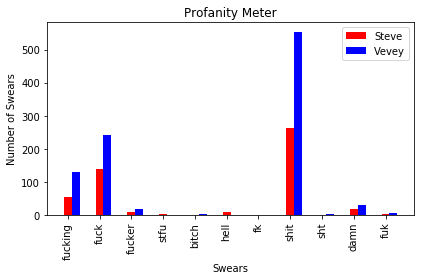

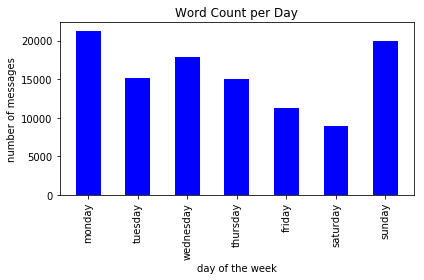

In [15]:
steveli_veveyzhan_profanity_meter(1)
day_of_the_week(0)
